## 소상공인시장진흥공단_상가(상권)정보_서울_202206

자료이용
- https://www.data.go.kr/data/15083033/fileData.do
- 소상공인시장진흥공단_상가(상권)정보

# 프로젝트명 : 카페 브랜드별로 지점 분석하기
- 이디야|스타벅스|메가|빽다방|투썸|컴포즈

##### 자료출처
- https://www.data.go.kr/data/15083033/fileData.do
- 소상공인시장진흥공단_상가(상권)정보

##### 분석 목적
- 어느지역에 카페가 가장 많이 모여있을까?
- 각 브랜드별로 지점개수가 얼마나 차이가 날까?
- 스타벅스는 어느지역에 가장 많이 분포할까?

##### 분석 라이브러리
- 판다스, 넘파이, 맷플롯립, 시본 pandas / seaborn / numpy / matplotlib

##### 컬럼
- 상호명, 상권업종대분류명, 상권업종중분류명, 상권업종소분류명, 시도명, 시군구명, 행정동명, 법정동명, 도로명주소, 경도, 위도

## 라이브러리 불러오기 및 데이터 확인

In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.font_manager as fm

# 노트북에 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

In [3]:
from IPython.display import set_matplotlib_formats # 시각화 그래프 내의 글자를 선명하게 해줌
%config InlineBackend.figure_format = 'retina'

In [12]:
sns.set(font = "Malgun Gothic", rc={"axes.unicode_minus":False},style="darkgrid")

# 그래프 선명하게

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\user\AppData\Local\Temp\ipykernel_12300\4078628849.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


C:\Users\user\AppData\Local\Temp\ipykernel_11856\4078628849.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [17]:
df = pd.read_csv("data/소상공인시장진흥공단_상가(상권)정보_서울_202206.csv",encoding="utf-8")
df.shape

(346229, 39)

In [18]:
# 데이터 확인
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375


In [19]:
# 컬럼 확인
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

## 전처리 과정

- 컬럼이 너무 많기 때문에 필요한 컬럼만 남겨두고 정리해두었습니다.
- 상권업종소분류명이 커피전문점/카페/다방으로 되어있는 부분만 따로 분리하였습니다.
- 각각의 상호명을 하나로 통일해주었습니다. (ex. star)
#### 전처리 결과 (총 테이블 2개로 정리하였습니다.)
- df_cafe : 상권업종소분류명이 커피전문점/카페/다방인 카페업종이 있는 테이블입니다.
- df_cafe_brand : 이디야|스타벅스|메가|빽다방|투썸|컴포즈만 따로 분리해놓은 테이블입니다.
- df_cafe_count : 각 브랜드마다 지점개수를 나타낸 테이블입니다.
- df_cafe_g : 강남구에 위치한 카페만 따로 분리해놓은 테이블입니다.
- df_cafe_s : 서울지역 스타벅스만 따로 분리해놓은 테이블입니다.
- df_cafe_s_count : 서울지역 스타벅스 지점 개수를 표현한 테이블입니다.

In [20]:
# 필요한 컬럼만 추출
columns = ['상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명','시도명',
           '시군구명','행정동명','법정동명','도로명주소','경도','위도']

df = df[columns].copy()
df.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,제중건강원,소매,건강/미용식품,건강원,서울특별시,영등포구,영등포동,영등포동5가,서울특별시 영등포구 영중로14길 11-17,126.907168,37.520613
1,민속악기사,소매,취미/오락관련소매,악기판매,서울특별시,성동구,용답동,용답동,서울특별시 성동구 용답5길 2,127.049018,37.566857
2,태평양진주,소매,시계/귀금속소매,시계/귀금속,서울특별시,종로구,종로1.2.3.4가동,봉익동,서울특별시 종로구 서순라길 17-10,126.993530,37.571848
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,송파구,방이1동,방이동,서울특별시 송파구 위례성대로12길 31,127.121520,37.510967
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,서울특별시 서초구 동광로18길 82,126.991394,37.488375


In [21]:
# 상권업종소분류명에 커피전문점/카페/다방으로 되어있는 부분이 있는지 확인하기
df['상권업종소분류명'].unique()

array(['건강원', '악기판매', '시계/귀금속', '학원-입시', '한식/백반/한정식', '민속주점', '학원-디자인',
       '타이어판매', '부동산중개', '카메라판매', '족발/보쌈전문', '곱창/양구이전문', '독서실',
       '커피전문점/카페/다방', '욕탕업-종합', '주유소', '토스트전문', '삼계탕전문', '자동차정비/카센타',
       '핸드폰소매', '꽃집/꽃배달', '비만/피부관리', '사무용기기소매', '중국음식/중국집', '세차장', '기원',
       '얼음가게', '편의점', '세탁소/빨래방', '패션디자인', '아동복판매', '수퍼마켓', '컴퓨터/사무용기기종합',
       '청소/소독', '가방/가죽제품소매', '섬유/직물/주단', '정육점', '종합소매', '패밀리레스토랑', '제과점',
       '양품점', '노래방', '지물판매', '일반의류', '인테리어/욕실용품/커튼', '백화점', '사무/문구용품',
       '운동/경기용품', '번역/통역서비스', '레크레이션지도/상담', '컴퓨터/주변기기', '학원(종합)',
       '일반가전제품', '인터넷PC방', '어린이집', '떡전문', '여성미용실', '렌트카', '운동/코치학교',
       '통신판매', '사진관', '부대찌개/섞어찌개', '주방가구판매', '국수/만두/칼국수', '사업경영상담',
       '화장품판매점', '청과물소매', '안경원', '애견/애완/동물사육판매', '등산용품판매', '피아노/바이올린/기타',
       '닭내장/닭발요리', '이민유학알선', '셔터/새시판매', '죽전문점', '호프/맥주', '빠/카페/스탠드빠',
       '캐쥬얼/스포츠의류', '주택수리종합', '도시락전문점', '해장국/감자탕', '연극/음악/예술관련기타',
       '두부요리전문', '모텔/여관/여인숙', '호텔/콘도', '건강식품판매', '육류소매', '보청기판매', '골프장',
       '침구/수예품'

In [22]:
# 커피전문점/카페/다방만 따로 분리하기
df_cafe = df.loc[df["상권업종소분류명"].str.contains("커피전문점/카페/다방")].copy()
df_cafe.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
20,커피빈,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,혜화동,명륜4가,서울특별시 종로구 대명길 25,127.000171,37.583149
96,요거프레소,음식,커피점/카페,커피전문점/카페/다방,서울특별시,도봉구,쌍문2동,쌍문동,서울특별시 도봉구 도당로 7,127.034746,37.658728
188,우성커피숍,음식,커피점/카페,커피전문점/카페/다방,서울특별시,양천구,신월4동,신월동,서울특별시 양천구 오목로 48,126.842935,37.522055
195,버블베어,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강서구,방화3동,방화동,서울특별시 강서구 금낭화로 167,126.813358,37.580941
230,알뤼르,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,대치4동,대치동,서울특별시 강남구 삼성로85길 33,127.054731,37.504378


In [23]:
df_cafe['상호명'].unique()

array(['커피빈', '요거프레소', '우성커피숍', ..., '타이니커피브루잉스튜디오', '모센트', '베러나이브스'],
      dtype=object)

## 데이터 시각화 하기
- 카페가(일반카페 포함)어느 지역에 가장 많이 모여있는지 막대그래프로 시각화하였습니다.
- 브랜드별로(이디야|스타벅스|메가|빽다방|투썸|컴포즈) 지점개수를 막대그래프와 텍스트로 시각화하였습니다.
- 브랜드 지점 개수 그래프위에 수치를 표현하고 각 브랜드의 색상에 맞게 한번 더 시각화하였습니다. 
- 강남지역에 가장 많은 프렌차이즈점 개수를 시각화하였습니다.
- 어느 지역에 스타벅스가 가장 모여있는지 map과 텍스트로 시각화하였습니다.
- 강남구에서 각각의 카페들이 가깝게 위치하는지 확인하기 위해 map으로 시각화하였습니다.

<AxesSubplot:xlabel='시군구명', ylabel='count'>

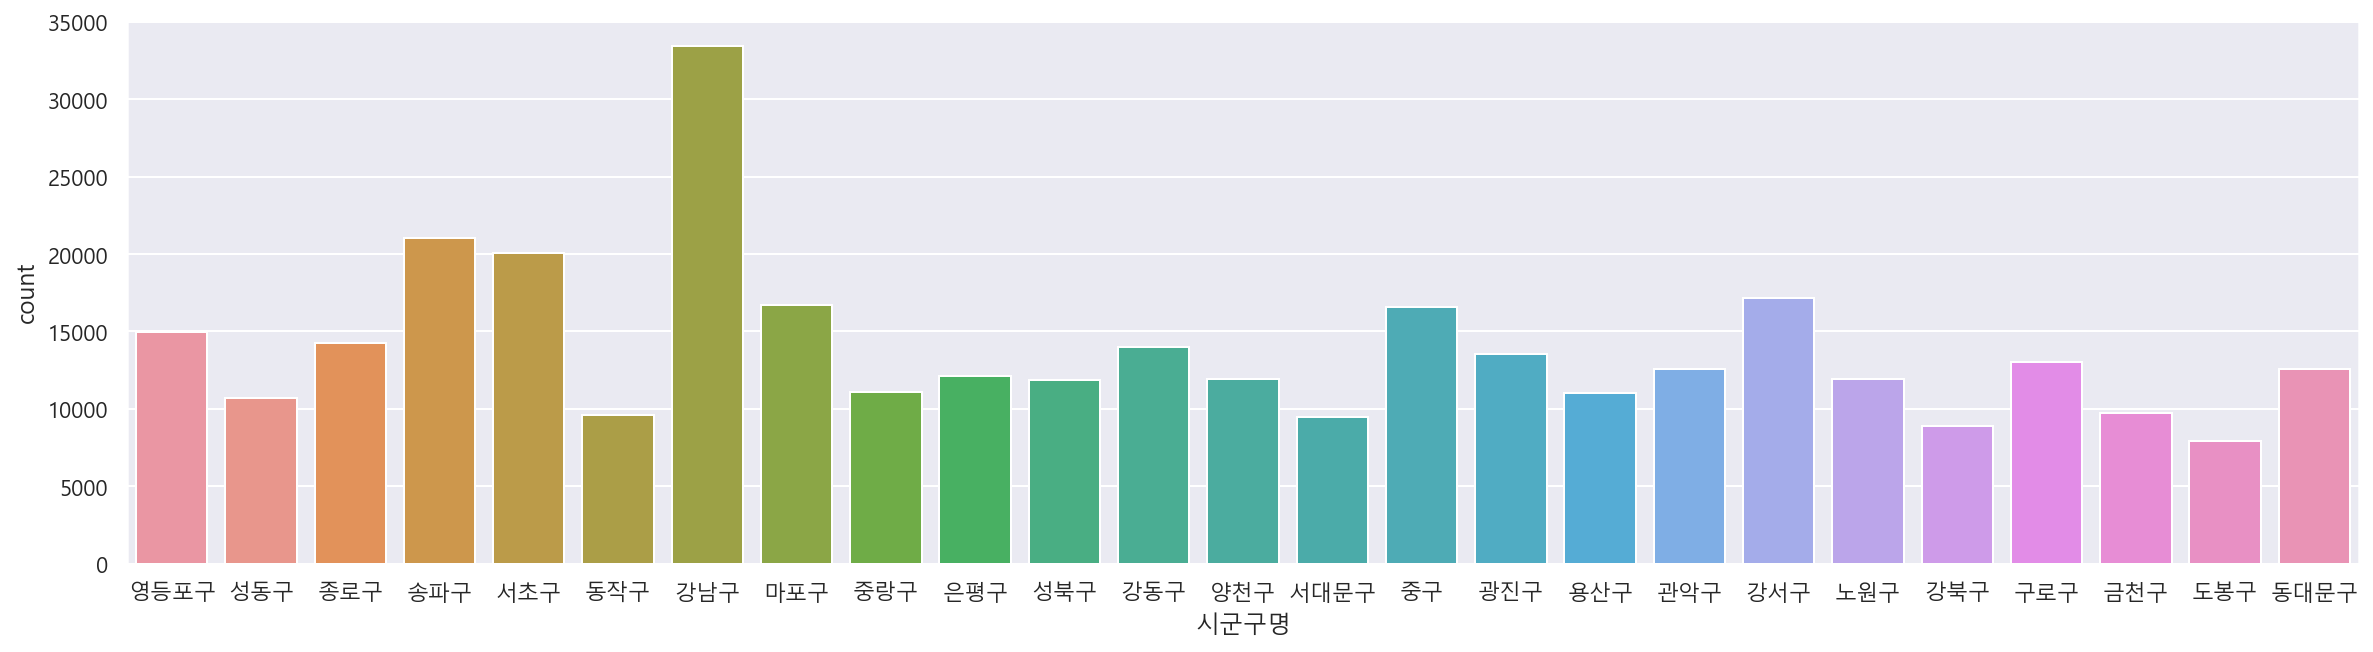

In [24]:
# 카페가 어느지역에 많이 모여있는지 확인하기
plt.figure(figsize=(20,5))
sns.countplot(data = df,x="시군구명")

# 강남구에 가장 많이 모여있다는 것을 알 수 있다.

In [25]:
# 이름을 각각 하나로 통일해준다.
df_cafe.loc[df_cafe["상호명"].str.contains("이디아|이디야"),"상호명"] = "이디야커피"
df_cafe.loc[df_cafe["상호명"].str.contains("스타벅스|starbucks"),"상호명"] = "스타벅스"
df_cafe.loc[df_cafe["상호명"].str.contains("메가|mega"),"상호명"] = "메가엠지씨커피"
df_cafe.loc[df_cafe["상호명"].str.contains("빽다방"),"상호명"] = "빽다방"
df_cafe.loc[df_cafe["상호명"].str.contains("투썸|twosome"),"상호명"] = "투썸플레이스"
df_cafe.loc[df_cafe["상호명"].str.contains("컴포즈"),"상호명"] = "컴포즈"

In [26]:
df_cafe_brand = df_cafe.loc[df_cafe["상호명"].str.contains("이디야|스타벅스|메가|빽다방|투썸|컴포즈")].copy()
df_cafe_brand = df_cafe_brand.reset_index(drop=True)
df_cafe_brand.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로 353,126.918062,37.515118
1,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 63로 40,126.939198,37.519544
2,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,이화동,동숭동,서울특별시 종로구 동숭길 110,127.003887,37.582964
3,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,양재2동,양재동,서울특별시 서초구 동산로 3,127.040265,37.469075
4,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,금천구,시흥2동,시흥동,서울특별시 금천구 금하로 750,126.913646,37.449066


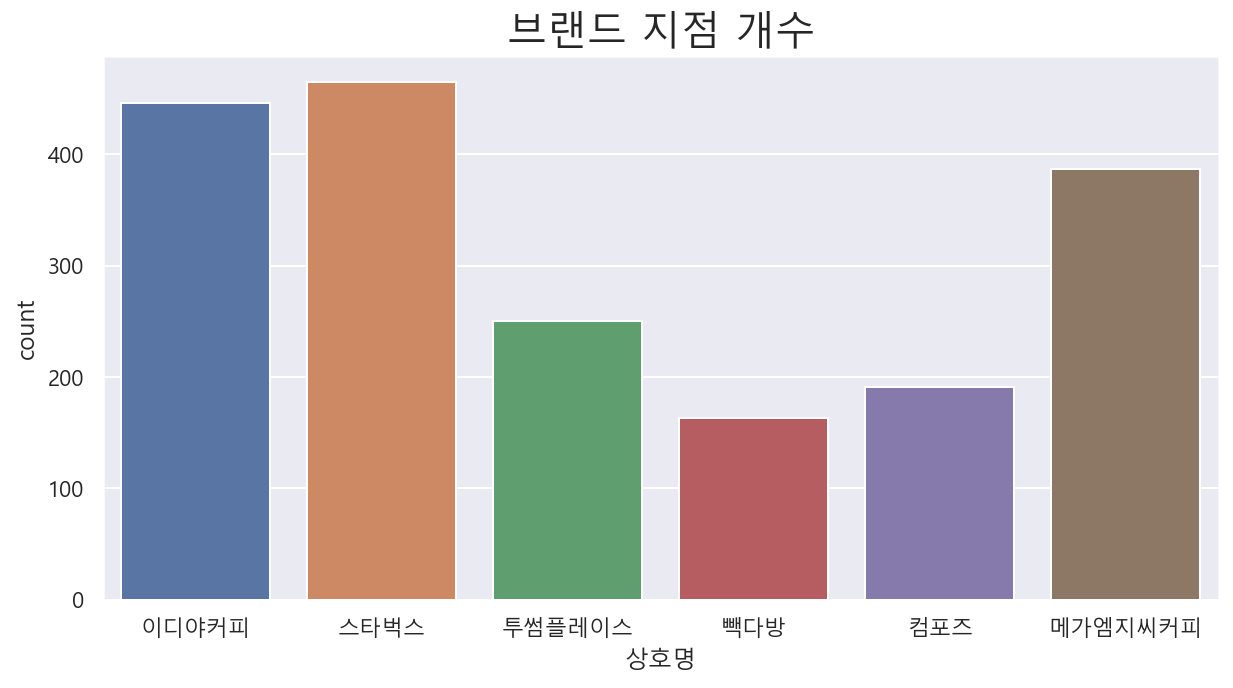

In [27]:
# 어떤 프렌차이즈가 가장 많은지 시각화 표현하기

plt.figure(figsize=(10,5))
plt.title("브랜드 지점 개수", fontsize = 20)
sns.countplot(data = df_cafe_brand,x="상호명")
plt.show()

# 스타벅스가 가장 많으며, 빽다방이 가장 적다는 것을 알 수 있다.

In [28]:
# 텍스트로 표현하기
df_cafe_count = df_cafe_brand['상호명'].value_counts(ascending = False)
df_cafe_count = df_cafe_count.reset_index(name='count')
df_cafe_count.columns = ["카페_상호명","count"]
df_cafe_count

,카페_상호명,count
0,스타벅스,465
1,이디야커피,446
2,메가엠지씨커피,387
3,투썸플레이스,250
4,컴포즈,191
5,빽다방,163


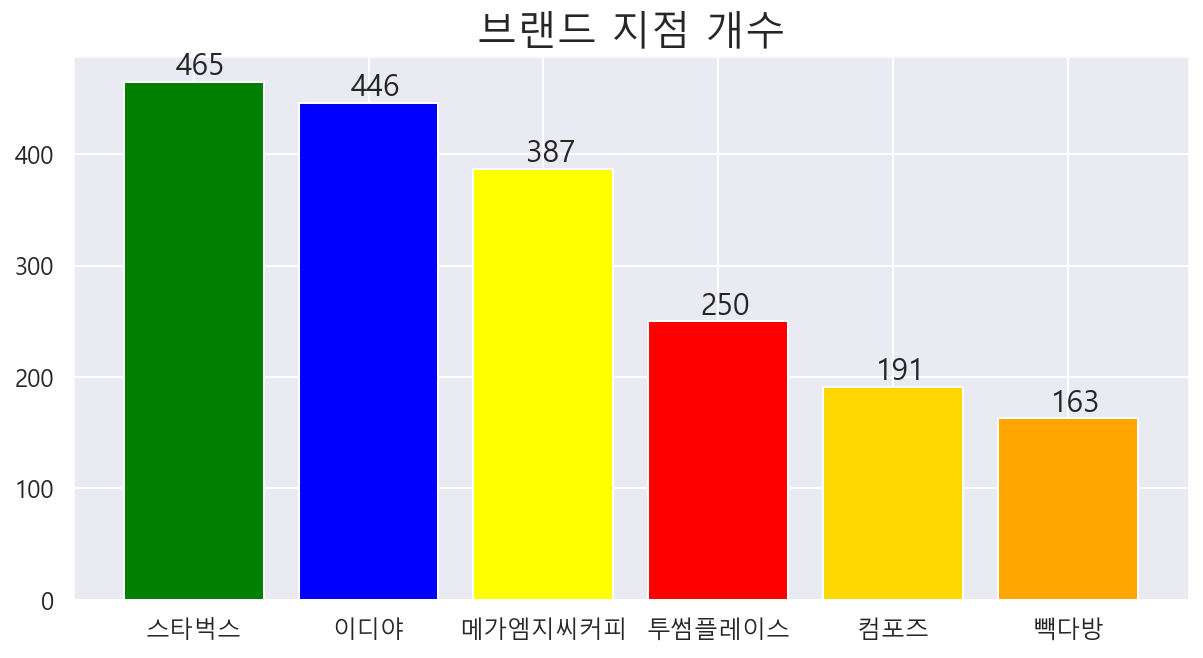

In [29]:
# 브랜드 지점 개수 그래프위에 수치를 표현하고 각 브랜드의 색상에 맞게 시각화하였습니다. 

starbucks = int(df_cafe_brand['상호명'][df_cafe_brand['상호명'] == '스타벅스'].count())
ediya = int(df_cafe_brand['상호명'][df_cafe_brand['상호명'] == '이디야커피'].count())
mega = int(df_cafe_brand['상호명'][df_cafe_brand['상호명'] == '메가엠지씨커피'].count())
twosome = int(df_cafe_brand['상호명'][df_cafe_brand['상호명'] == '투썸플레이스'].count())
compose = int(df_cafe_brand['상호명'][df_cafe_brand['상호명'] == '컴포즈'].count())
paik = int(df_cafe_brand['상호명'][df_cafe_brand['상호명'] == '빽다방'].count())
x = ["스타벅스", "이디야", "메가엠지씨커피","투썸플레이스", "컴포즈", "빽다방"]
y = [starbucks,ediya,mega,twosome,compose,paik]
color = ['green','blue','yellow','red','gold','orange'] ## 색상 지정
#dodger
plt.figure(figsize=(10,5))
plt.title("브랜드 지점 개수", fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.bar(x, y,color = color)
# plt.ylim(0, 10000)

for index, value in enumerate(y):
    plt.text(index - 0.1, value, str(value), fontsize = 15, verticalalignment='bottom')
plt.show()
# 저가브랜드가 노란색을 사용하는 이유는 마케팅에 큰 비용을 쓸 수 없기 때문에 
# 눈에 띄는 노란색을 이용하여 브랜드를 각인시키는 효과를 얻을 수 있기 때문이다.

In [55]:
# 강남구의 카페 개수표현하기
df_cafe_m = df_cafe_brand.groupby(["시군구명","상호명"])["상호명"].count()
df_cafe_m = pd.DataFrame(df_cafe_m) # 데이터프레임 변환
df_cafe_m.columns = ["count"] # 컬럼명 변경
df_cafe_m = df_cafe_m.reset_index() # 인덱스 새로 만들기
df_cafe_m.head()

,시군구명,상호명,count
0,강남구,메가엠지씨커피,13
1,강남구,빽다방,9
2,강남구,스타벅스,76
3,강남구,이디야커피,28
4,강남구,컴포즈,13


In [56]:
df_cafe_g = df_cafe_m.loc[df_cafe_m["시군구명"].str.contains("강남구")].copy()
df_cafe_g.head()

,시군구명,상호명,count
0,강남구,메가엠지씨커피,13
1,강남구,빽다방,9
2,강남구,스타벅스,76
3,강남구,이디야커피,28
4,강남구,컴포즈,13


In [57]:
df_cafe_g.sort_values(by='count',ascending = False)

# 강남지역에는 스타벅스가 가장 많은 것으로 나타났다.

,시군구명,상호명,count
2,강남구,스타벅스,76
5,강남구,투썸플레이스,33
3,강남구,이디야커피,28
0,강남구,메가엠지씨커피,13
4,강남구,컴포즈,13
1,강남구,빽다방,9


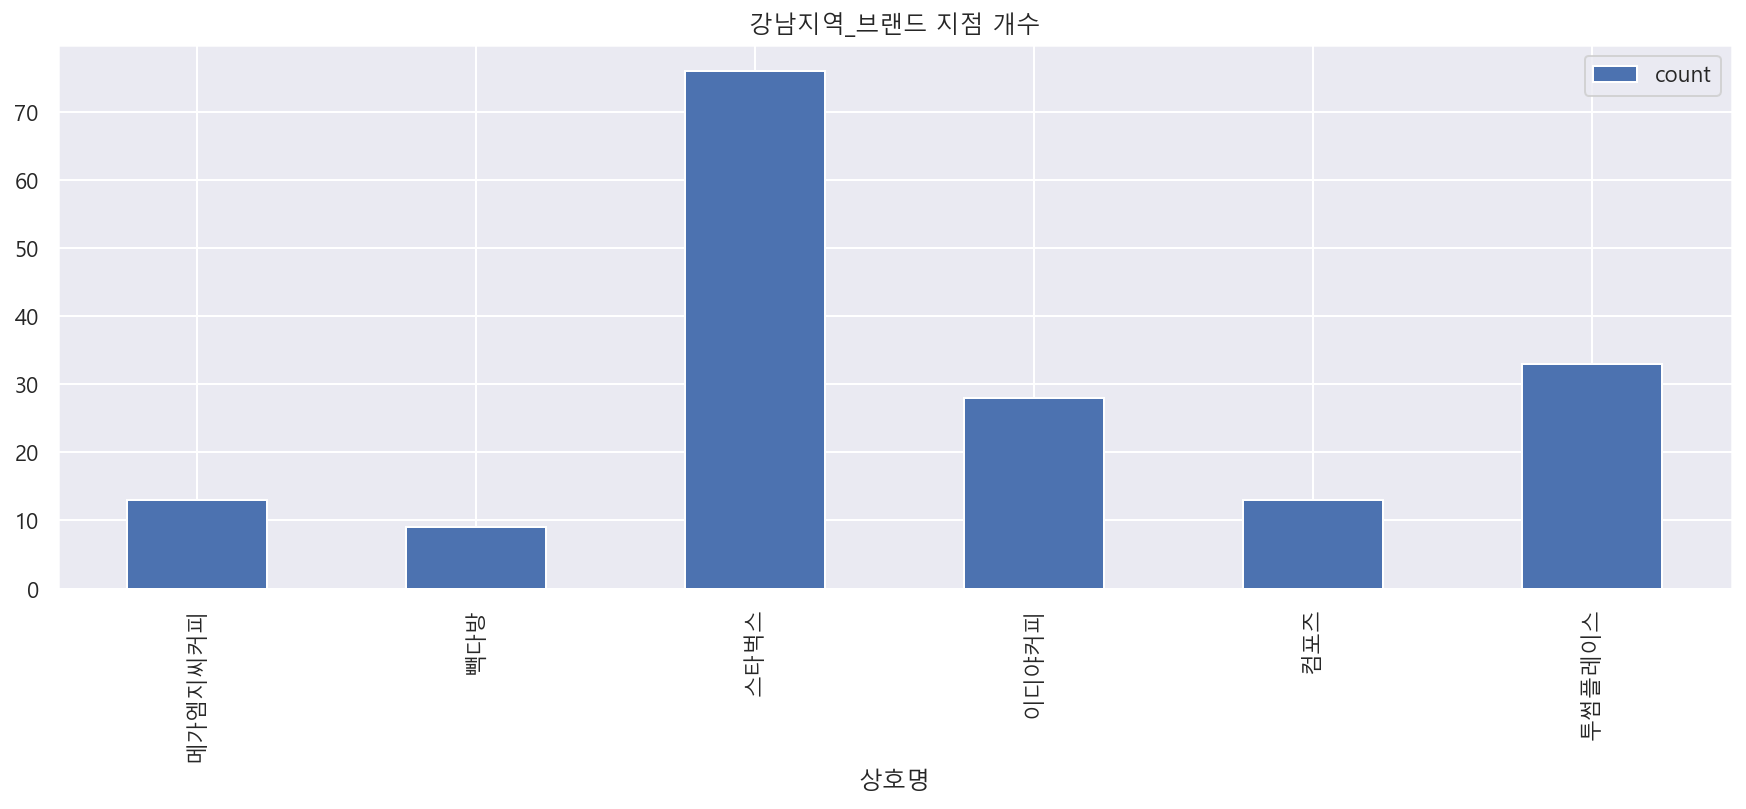

In [33]:
# 강남지역에 가장 많은 프렌차이즈점 확인하기
df_cafe_g.plot.bar(x="상호명",title="강남지역_브랜드 지점 개수",figsize=(15,5))
plt.show()

# 강남에는 스타벅스가 가장 많다는 것을 알 수 있다.

In [34]:
# 지도 시각화
import folium

### 스타벅스만 따로 추출하기 (서울지역만)

In [58]:
# 어느 지역에 스타벅스가 가장 모여있는지 확인하기위해 스타벅스만 따로 추출하기
df_cafe_s = df_cafe_brand.loc[df_cafe_brand["상호명"].str.contains("스타벅스")].copy()
df_cafe_s.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
2,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,이화동,동숭동,서울특별시 종로구 동숭길 110,127.003887,37.582964
5,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,서초3동,서초동,서울특별시 서초구 효령로 274,127.014198,37.484386
7,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,양천구,목1동,목동,서울특별시 양천구 목동동로 257,126.874682,37.527147
8,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강북구,송중동,미아동,서울특별시 강북구 도봉로 32,127.030685,37.611841
9,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,신사동,신사동,서울특별시 강남구 논현로175길 94,127.021629,37.523184


In [41]:
df_cafe_s = df_cafe_s.drop(['상권업종대분류명','상권업종중분류명','상권업종소분류명','행정동명','법정동명','도로명주소'],axis=1)

In [47]:
df_cafe_s_count = df_cafe_s.groupby(["시군구명","상호명"])["상호명"].count()

In [48]:
df_cafe_s_count = pd.DataFrame(df_cafe_s_count) # 데이터프레임 변환
df_cafe_s_count.columns = ["count"] # 컬럼명 변경
df_cafe_s_count = df_cafe_s_count.reset_index() # 인덱스 새로 만들기
df_cafe_s_count.head()

,시군구명,상호명,count
0,강남구,스타벅스,76
1,강동구,스타벅스,13
2,강북구,스타벅스,5
3,강서구,스타벅스,16
4,관악구,스타벅스,11


In [53]:
df_cafe_s_count.sort_values(by=['count'],ascending=False)

# 강남구에 76개로 가장 많으며, 도봉구 지역에 가장 적게 있다.

,시군구명,상호명,count
0,강남구,스타벅스,76
23,중구,스타벅스,42
14,서초구,스타벅스,38
17,송파구,스타벅스,33
22,종로구,스타벅스,28
19,영등포구,스타벅스,28
12,마포구,스타벅스,26
20,용산구,스타벅스,18
3,강서구,스타벅스,16
13,서대문구,스타벅스,16


In [40]:
# 어느 지역에 스타벅스가 가장 모여있는지 확인
lat = df_cafe_s['위도'].mean()
long = df_cafe_s['경도'].mean()

m = folium.Map([lat,long], zoom_start=12)

for i in df_cafe_s.index:
    sub_lat = df_cafe_s.loc[i, "위도"]
    sub_long = df_cafe_s.loc[i, "경도"]
    title = df_cafe_s.loc[i, "시군구명"] + "_" + df_cafe_s.loc[i, "행정동명"] + "/" + df_cafe_s.loc[i, "상호명"] 
    icon_color = "blue"
    
    folium.Marker([sub_lat,sub_long],icon=folium.Icon(color=icon_color),popup=f'<i>{title}</i>',tooltip=title).add_to(m)

m

In [42]:
# 강남구에 있는 카페들 추출하기
df_cafe_gang = df_cafe_brand.loc[df_cafe_brand["시군구명"].str.contains("강남구")].copy()
df_cafe_gang = df_cafe_gang.reset_index(drop=True)
df_cafe_gang.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,신사동,신사동,서울특별시 강남구 논현로175길 94,127.021629,37.523184
1,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,삼성2동,삼성동,서울특별시 강남구 봉은사로 446,127.048501,37.511357
2,투썸플레이스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,도곡1동,도곡동,서울특별시 강남구 언주로 211,127.046294,37.492795
3,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,청담동,청담동,서울특별시 강남구 도산대로 532,127.051572,37.524339
4,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,삼성1동,삼성동,서울특별시 강남구 영동대로 513,127.059139,37.511820


In [23]:
# 강남구에서 각각의 카페들이 가깝게 위치하는지 확인하기
m = folium.Map([df_cafe_gang['위도'].mean(),df_cafe_gang['경도'].mean()], zoom_start=15)

for i in df_cafe_gang.index:
    sub_lat = df_cafe_gang.loc[i, "위도"]
    sub_long = df_cafe_gang.loc[i, "경도"]
    title = df_cafe_gang.loc[i, "시군구명"] + "_" + df_cafe_gang.loc[i, "행정동명"] + "/" + df_cafe_gang.loc[i, "상호명"] 

    if df_cafe_gang.loc[i, "상호명"] == "스타벅스":
        icon_color = "red"
    elif df_cafe_gang.loc[i, "상호명"] == "메가엠지씨커피":
        icon_color = "purple"
    elif df_cafe_gang.loc[i, "상호명"] == "이디야커피":
        icon_color = "blue"
    elif df_cafe_gang.loc[i, "상호명"] == "빽다방":
        icon_color = "gray"
    else:
        icon_color = "green" # 투썸
    
    folium.Marker([sub_lat,sub_long],icon=folium.Icon(color=icon_color),popup=f'<i>{title}</i>',tooltip=title).add_to(m)

m
# 빨강 = 스타벅스
# 보라 = 메가엠지씨커피
# 블루 = 이디야커피
# 회색 = 빽다방
# 그린 = 투썸

### 결론
- 서울 지역에는 예상대로 스타벅스가 가장 많이 분포되어 있었고, 그 다음으로는 이디야였습니다.
- 서울 지역 -> 
- 대부분의 카페들이 서로 붙어있는 것을 알 수 있었습니다.

### 처음에 했던 질문
> 어느지역에 카페가 가장 많이 모여있을까?
>> - (일반카페포함) 강남지역에 카페가 가장 많이 분포해 있는 것을 알 수 있습니다. (강남구 -> 송파구 -> 서초구)
>> - 강남구 지역을 지도로 시각해보았을 때 대부분의 카페의 브랜드들이 서로 붙어있는 것을 알 수 있었습니다.

> 각 브랜드별로 지점개수가 얼마나 차이가 날까?
>> - 서울시 6개의 브랜드 지점 개수 중에 스타벅스와 이디야커피가 가장 많다는 것을 알 수 있었습니다. 
>> - 스타벅스 : 465개 / 이디야 : 446개 / 메가엠지씨커피 : 387개 / 투썸플레이스 : 250개 / 컴포즈 : 191개 / 빽다방 : 163개
>> - 이디야|스타벅스|메가|빽다방|투썸|컴포즈

> 스타벅스는 어느지역에 가장 많이 분포할까?
>> - 강남지역에는 스타벅스가 투썸플레이스보다 2배가량 더 많이 분포해 있었습니다.
>> - 스타벅스만 따로 추출하였을때 강남구에 가장 많이 있었고, 그다음으로는 중구, 서초구순이었습니다.
>> - 지도로 보았을 때도 강남지역에 스타벅스가 가장 많이 분포되어 있는 것을 알 수 있었습니다.
